In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller

/Users/admin/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Train dataset

In [2]:
#uploading train dataset
train = pd.read_csv("train_aWnotuB.csv",parse_dates=[0],index_col="DateTime")

In [3]:
#first few rows of train
train.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [4]:
#dimensions of train dataset
train.shape

(48120, 3)

In [5]:
#train dataset datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48120 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 3 columns):
Junction    48120 non-null int64
Vehicles    48120 non-null int64
ID          48120 non-null int64
dtypes: int64(3)
memory usage: 1.5 MB


In [6]:
#summary statistics of train dataset
train.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [7]:
#changing the data type of "Vehicles" column from integer to float
train.Vehicles = train.Vehicles.astype("float64")

### Dividing train dataset into four seperate dataframes based on four types of "Junction"

In [8]:
train1 = train[train["Junction"] == 1]
train1_df = train1[["Vehicles"]]

In [9]:
train2 = train[train["Junction"] == 2]
train2_df = train2[["Vehicles"]]

In [10]:
train3 = train[train["Junction"] == 3]
train3_df = train3[["Vehicles"]]

In [11]:
train4 = train[train["Junction"] == 4]
train4_df = train4[["Vehicles"]]

In [12]:
train4_df.head()

,Vehicles
DateTime,
2017-01-01 00:00:00,3.0
2017-01-01 01:00:00,1.0
2017-01-01 02:00:00,4.0
2017-01-01 03:00:00,4.0
2017-01-01 04:00:00,2.0


In [13]:
#checking the dimensions of the dataset created
[train1_df.shape,train2_df.shape,train3_df.shape,train4_df.shape]

[(14592, 1), (14592, 1), (14592, 1), (4344, 1)]

## Test dataset

In [14]:
#uploading test dataset
test = pd.read_csv("test_BdBKkAj.csv",parse_dates=[0],index_col="DateTime")

In [15]:
#first few rows of test dataset
test.head()

,Junction,ID
DateTime,,
2017-07-01 00:00:00,1,20170701001
2017-07-01 01:00:00,1,20170701011
2017-07-01 02:00:00,1,20170701021
2017-07-01 03:00:00,1,20170701031
2017-07-01 04:00:00,1,20170701041


In [16]:
#dimensions of test dataset
test.shape

(11808, 2)

In [17]:
#test dataset datatypes
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11808 entries, 2017-07-01 00:00:00 to 2017-10-31 23:00:00
Data columns (total 2 columns):
Junction    11808 non-null int64
ID          11808 non-null int64
dtypes: int64(2)
memory usage: 276.8 KB


### Dividing test dataset into four seperate dataframes based on four types of "Junction"

In [18]:
test1 = test[test["Junction"] == 1]
test1_df = test1.drop(["Junction","ID"],axis=1)

In [19]:
test2 = test[test["Junction"] == 2]
test2_df = test2.drop(["Junction","ID"],axis=1)

In [20]:
test3 = test[test["Junction"] == 3]
test3_df = test3.drop(["Junction","ID"],axis=1)

In [21]:
test4 = test[test["Junction"] == 4]
test4_df = test4.drop(["Junction","ID"],axis=1)

In [22]:
test4_df.head()

""
DateTime
2017-07-01 00:00:00
2017-07-01 01:00:00
2017-07-01 02:00:00
2017-07-01 03:00:00
2017-07-01 04:00:00


In [23]:
#checking the dimensions of the dataset created
[test1_df.shape,test2_df.shape,test3_df.shape,test4_df.shape]

[(2952, 0), (2952, 0), (2952, 0), (2952, 0)]

## Working with the first train dataframe (train1_df) where "junction" = 1

### Plotting the train1 dataframe

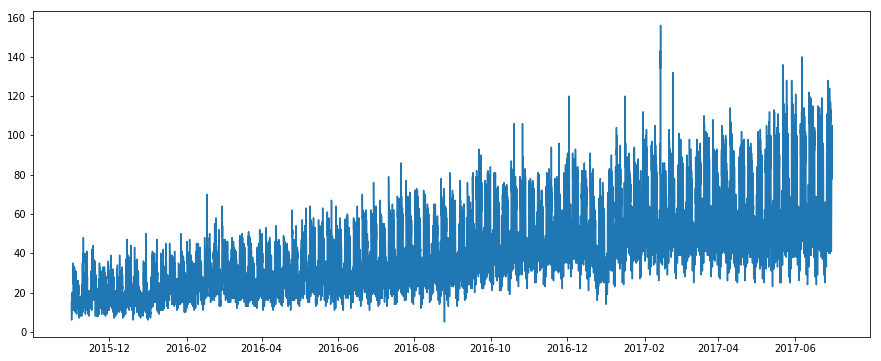

In [24]:
plt.plot(train1_df)

### Creating a function to test the stationarity of the data

In [25]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  """


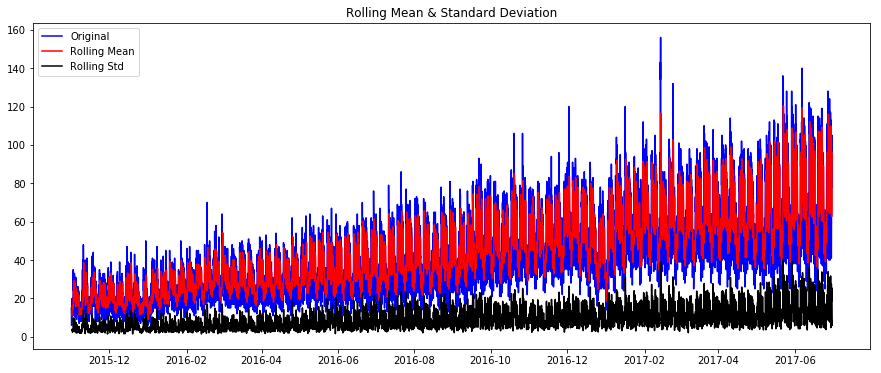

Results of Dickey-Fuller Test:
Test Statistic                -7.148078e+00
p-value                        3.193843e-10
#Lags Used                     4.200000e+01
Number of Observations Used    1.454900e+04
Critical Value (1%)           -3.430800e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [26]:
test_stationarity(train1_df)

Since the value of test Statistic is less than Critical Value at 1% therefore, we can say with 99% confidence that this series is stationery

## ACF & PACF for order of ARIMA model

In [27]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [28]:
#creating diffs by 1 period
ts_diff1 = train1_df - train1_df.shift()
ts_diff1.dropna(inplace=True)

In [29]:
lag_acf1 = acf(ts_diff1, nlags=24)
lag_pacf1 = pacf(ts_diff1, nlags=24, method='ols')

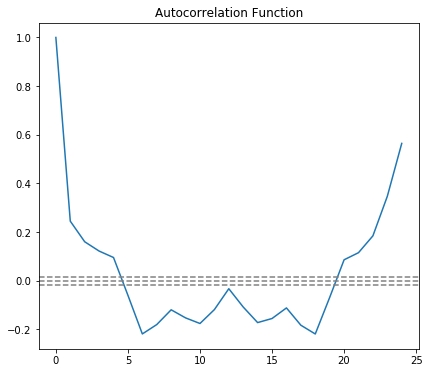

In [30]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

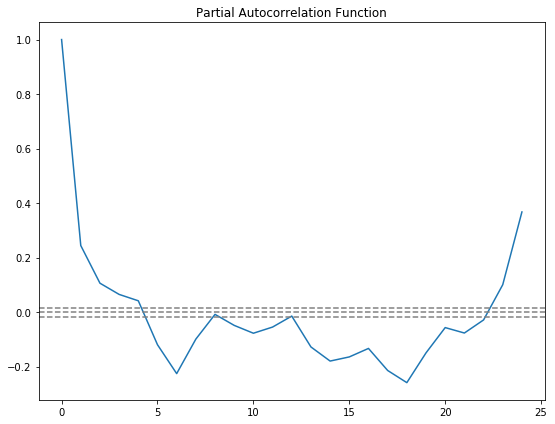

In [31]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [32]:
from statsmodels.tsa.arima_model import ARIMA

## AR Model

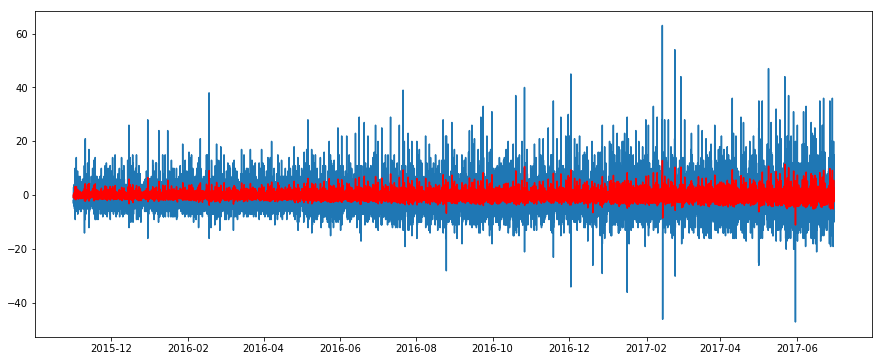

In [33]:
model1 = ARIMA(train1_df, order=(2, 1, 0))  
results_AR1 = model1.fit(disp=-1)  
plt.plot(ts_diff1)
plt.plot(results_AR1.fittedvalues, color='red')

## MA Model

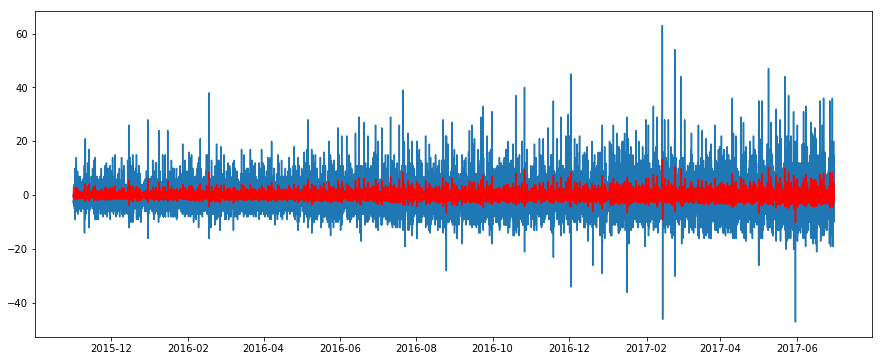

In [34]:
model1 = ARIMA(train1_df, order=(0, 1, 2))  
results_MA1 = model1.fit(disp=-1)  
plt.plot(ts_diff1)
plt.plot(results_MA1.fittedvalues, color='red')

## Combined Model

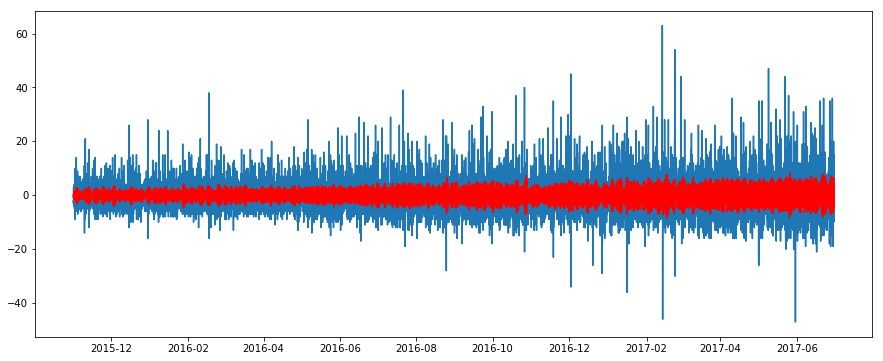

In [35]:
model = ARIMA(train1_df, order=(2, 1, 2))  
results_ARIMA1 = model.fit(disp=-1)  
plt.plot(ts_diff1)
plt.plot(results_ARIMA1.fittedvalues, color='red')

## ARIMA model for out of sample prediction (one step)

In [36]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

# seasonal difference
X = train1_df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                14227
Model:                     ARMA(7, 1)   Log Likelihood              -49624.072
Method:                       css-mle   S.D. of innovations              7.917
Date:                Sat, 18 Nov 2017   AIC                          99268.144
Time:                        21:56:11   BIC                          99343.773
Sample:                             0   HQIC                         99293.302
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3763      0.528      2.605      0.009       0.341       2.412
ar.L1.y        1.1357      0.035     32.679      0.000       1.068       1.204
ar.L2.y       -0.1055      0.040     -2.624      0.0

## ARIMA model for out of sample prediction (multiple step)

In [37]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

# seasonal difference
X = train1_df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=2952)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
step = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Step %d: %f' % (step, inverted))
    history.append(inverted)
    step += 1

Step 1: 80.050723
Step 2: 79.539820
Step 3: 69.282646
Step 4: 69.636436
Step 5: 73.987783
Step 6: 72.292698
Step 7: 58.668114
Step 8: 55.841044
Step 9: 48.953813
Step 10: 42.733310
Step 11: 40.393788
Step 12: 43.494172
Step 13: 48.423791
Step 14: 51.411825
Step 15: 66.673380
Step 16: 87.375742
Step 17: 100.499258
Step 18: 98.927028
Step 19: 94.541699
Step 20: 99.223131
Step 21: 99.844500
Step 22: 104.315191
Step 23: 93.603786
Step 24: 105.716672
Step 25: 96.682526
Step 26: 103.549921
Step 27: 82.376245
Step 28: 83.210231
Step 29: 75.084598
Step 30: 69.017039
Step 31: 56.010607
Step 32: 47.055084
Step 33: 37.132397
Step 34: 35.222844
Step 35: 29.308880
Step 36: 30.377368
Step 37: 32.421223
Step 38: 41.439558
Step 39: 46.436218
Step 40: 55.417840
Step 41: 56.392110
Step 42: 57.366171
Step 43: 56.345382
Step 44: 55.332756
Step 45: 62.329028
Step 46: 60.333082
Step 47: 53.342581
Step 48: 54.354698
Step 49: 69.366775
Step 50: 70.376773
Step 51: 59.383494
Step 52: 55.386608
Step 53: 56.38650

Step 765: 32.061421
Step 766: 33.129908
Step 767: 35.173763
Step 768: 44.192099
Step 769: 49.188758
Step 770: 58.170380
Step 771: 59.144650
Step 772: 60.118711
Step 773: 59.097922
Step 774: 58.085296
Step 775: 65.081568
Step 776: 63.085622
Step 777: 56.095121
Step 778: 57.107238
Step 779: 72.119315
Step 780: 73.129313
Step 781: 62.136034
Step 782: 58.139148
Step 783: 59.139049
Step 784: 53.136614
Step 785: 45.132923
Step 786: 41.129017
Step 787: 38.125717
Step 788: 32.123530
Step 789: 30.122627
Step 790: 28.122899
Step 791: 34.124041
Step 792: 39.125657
Step 793: 42.127356
Step 794: 53.128822
Step 795: 53.129857
Step 796: 56.130385
Step 797: 53.130441
Step 798: 51.130136
Step 799: 49.129620
Step 800: 52.129046
Step 801: 56.128537
Step 802: 54.128175
Step 803: 61.127997
Step 804: 65.127993
Step 805: 60.128125
Step 806: 64.128339
Step 807: 63.128577
Step 808: 52.128792
Step 809: 46.128951
Step 810: 43.129040
Step 811: 39.129059
Step 812: 33.129024
Step 813: 38.128954
Step 814: 42.128871


Step 2746: 96.010162
Step 2747: 99.010162
Step 2748: 105.010162
Step 2749: 101.010162
Step 2750: 92.010162
Step 2751: 86.010162
Step 2752: 86.010162
Step 2753: 77.010162
Step 2754: 65.010162
Step 2755: 58.010162
Step 2756: 53.010162
Step 2757: 44.010162
Step 2758: 40.010162
Step 2759: 45.010162
Step 2760: 47.010162
Step 2761: 49.010162
Step 2762: 55.010162
Step 2763: 62.010162
Step 2764: 66.010162
Step 2765: 66.010162
Step 2766: 64.010162
Step 2767: 66.010162
Step 2768: 67.010162
Step 2769: 69.010162
Step 2770: 67.010162
Step 2771: 69.010162
Step 2772: 76.010162
Step 2773: 75.010162
Step 2774: 77.010162
Step 2775: 75.010162
Step 2776: 74.010162
Step 2777: 68.010162
Step 2778: 55.010162
Step 2779: 46.010162
Step 2780: 44.010162
Step 2781: 39.010162
Step 2782: 36.010162
Step 2783: 38.010162
Step 2784: 43.010162
Step 2785: 48.010162
Step 2786: 55.010162
Step 2787: 63.010162
Step 2788: 67.010162
Step 2789: 69.010162
Step 2790: 71.010162
Step 2791: 66.010162
Step 2792: 65.010162
Step 2793: 

I want this above output to be stored in a variable

Following is what I tried to do but the values of the output above and the values of what I have saved in the variable are different

In [38]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

# seasonal difference
X = train1_df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=2952)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
result = []
step = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Step %d: %f' % (step, inverted))
    result.append(inverted)
    step += 1

Step 1: 80.050723
Step 2: 80.539820
Step 3: 82.282646
Step 4: 85.636436
Step 5: 90.987783
Step 6: 96.292698
Step 7: 100.668114
Step 8: 103.841044
Step 9: 105.953813
Step 10: 106.733310
Step 11: 106.393788
Step 12: 105.494172
Step 13: 104.423791
Step 14: 103.411825
Step 15: 102.673380
Step 16: 102.375742
Step 17: 102.499258
Step 18: 102.927028
Step 19: 103.541699
Step 20: 104.223131
Step 21: 104.844500
Step 22: 105.315191
Step 23: 105.603786
Step 24: 105.716672
Step 25: 105.682526
Step 26: 105.549921
Step 27: 105.376245
Step 28: 105.210231
Step 29: 105.084598
Step 30: 105.017039
Step 31: 105.010607
Step 32: 105.055084
Step 33: 105.132397
Step 34: 105.222844
Step 35: 105.308880
Step 36: 105.377368
Step 37: 105.421223
Step 38: 105.439558
Step 39: 105.436218
Step 40: 105.417840
Step 41: 105.392110
Step 42: 105.366171
Step 43: 105.345382
Step 44: 105.332756
Step 45: 105.329028
Step 46: 105.333082
Step 47: 105.342581
Step 48: 105.354698
Step 49: 105.366775
Step 50: 105.376773
Step 51: 105.38

Step 783: 105.376270
Step 784: 105.376270
Step 785: 105.376270
Step 786: 105.376270
Step 787: 105.376270
Step 788: 105.376270
Step 789: 105.376270
Step 790: 105.376270
Step 791: 105.376270
Step 792: 105.376270
Step 793: 105.376270
Step 794: 105.376270
Step 795: 105.376270
Step 796: 105.376270
Step 797: 105.376270
Step 798: 105.376270
Step 799: 105.376270
Step 800: 105.376270
Step 801: 105.376270
Step 802: 105.376270
Step 803: 105.376270
Step 804: 105.376270
Step 805: 105.376270
Step 806: 105.376270
Step 807: 105.376270
Step 808: 105.376270
Step 809: 105.376270
Step 810: 105.376270
Step 811: 105.376270
Step 812: 105.376270
Step 813: 105.376270
Step 814: 105.376270
Step 815: 105.376270
Step 816: 105.376270
Step 817: 105.376270
Step 818: 105.376270
Step 819: 105.376270
Step 820: 105.376270
Step 821: 105.376270
Step 822: 105.376270
Step 823: 105.376270
Step 824: 105.376270
Step 825: 105.376270
Step 826: 105.376270
Step 827: 105.376270
Step 828: 105.376270
Step 829: 105.376270
Step 830: 105

Step 2563: 105.376270
Step 2564: 105.376270
Step 2565: 105.376270
Step 2566: 105.376270
Step 2567: 105.376270
Step 2568: 105.376270
Step 2569: 105.376270
Step 2570: 105.376270
Step 2571: 105.376270
Step 2572: 105.376270
Step 2573: 105.376270
Step 2574: 105.376270
Step 2575: 105.376270
Step 2576: 105.376270
Step 2577: 105.376270
Step 2578: 105.376270
Step 2579: 105.376270
Step 2580: 105.376270
Step 2581: 105.376270
Step 2582: 105.376270
Step 2583: 105.376270
Step 2584: 105.376270
Step 2585: 105.376270
Step 2586: 105.376270
Step 2587: 105.376270
Step 2588: 105.376270
Step 2589: 105.376270
Step 2590: 105.376270
Step 2591: 105.376270
Step 2592: 105.376270
Step 2593: 105.376270
Step 2594: 105.376270
Step 2595: 105.376270
Step 2596: 105.376270
Step 2597: 105.376270
Step 2598: 105.376270
Step 2599: 105.376270
Step 2600: 105.376270
Step 2601: 105.376270
Step 2602: 105.376270
Step 2603: 105.376270
Step 2604: 105.376270
Step 2605: 105.376270
Step 2606: 105.376270
Step 2607: 105.376270
Step 2608:

In [39]:
result

[array([ 80.05072323]),
 array([ 80.53982021]),
 array([ 82.2826457]),
 array([ 85.63643613]),
 array([ 90.98778341]),
 array([ 96.29269764]),
 array([ 100.66811416]),
 array([ 103.84104419]),
 array([ 105.95381342]),
 array([ 106.73330969]),
 array([ 106.39378796]),
 array([ 105.49417245]),
 array([ 104.42379079]),
 array([ 103.41182533]),
 array([ 102.67338042]),
 array([ 102.37574173]),
 array([ 102.49925758]),
 array([ 102.92702753]),
 array([ 103.54169852]),
 array([ 104.22313087]),
 array([ 104.84449978]),
 array([ 105.315191]),
 array([ 105.6037861]),
 array([ 105.71667218]),
 array([ 105.68252596]),
 array([ 105.54992099]),
 array([ 105.37624466]),
 array([ 105.21023122]),
 array([ 105.0845985]),
 array([ 105.01703864]),
 array([ 105.01060695]),
 array([ 105.05508433]),
 array([ 105.13239671]),
 array([ 105.22284433]),
 array([ 105.30888027]),
 array([ 105.37736768]),
 array([ 105.4212228]),
 array([ 105.43955814]),
 array([ 105.43621757]),
 array([ 105.41783972]),
 array([ 105

In [40]:
output = []
for i in result:
    output.append(i[0])

In [41]:
output

[80.050723233586154,
 80.539820205230939,
 82.282645703191761,
 85.63643612642025,
 90.987783408649875,
 96.292697641720821,
 100.66811416223952,
 103.84104418889801,
 105.95381341668636,
 106.73330968898466,
 106.39378796354568,
 105.49417244746728,
 104.42379079124851,
 103.4118253340333,
 102.67338041636161,
 102.37574173211624,
 102.49925758018483,
 102.9270275295996,
 103.54169851931765,
 104.22313087234116,
 104.84449978464102,
 105.31519100412653,
 105.60378610013444,
 105.71667218250161,
 105.68252595946197,
 105.54992098936893,
 105.37624465674656,
 105.21023121586538,
 105.08459849625747,
 105.01703864139836,
 105.01060694595584,
 105.05508433104814,
 105.13239670567641,
 105.22284432710353,
 105.30888026660394,
 105.37736767640489,
 105.42122280225701,
 105.43955814123971,
 105.43621756813184,
 105.4178397196589,
 105.39210982591226,
 105.36617064824087,
 105.34538151225489,
 105.33275553445196,
 105.32902764736346,
 105.33308168162328,
 105.34258073245167,
 105.354697754556

In [42]:
test1_df["Vehicles"] = output

In [43]:
test1_df

,Vehicles
DateTime,
2017-07-01 00:00:00,80.050723
2017-07-01 01:00:00,80.539820
2017-07-01 02:00:00,82.282646
2017-07-01 03:00:00,85.636436
2017-07-01 04:00:00,90.987783
2017-07-01 05:00:00,96.292698
2017-07-01 06:00:00,100.668114
2017-07-01 07:00:00,103.841044
2017-07-01 08:00:00,105.953813


In [44]:
test1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2952 entries, 2017-07-01 00:00:00 to 2017-10-31 23:00:00
Data columns (total 1 columns):
Vehicles    2952 non-null float64
dtypes: float64(1)
memory usage: 46.1 KB


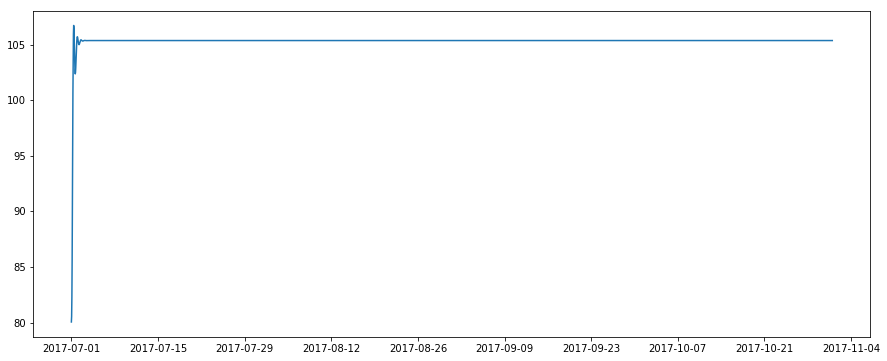

In [45]:
plt.plot(test1_df)